In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import os
import cv2

In [2]:
def claheAdapter(img):
    lab_img= cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab_img)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    updated_lab_img2 = cv2.merge((clahe_img,a,b))
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2RGB)
    return CLAHE_img

In [3]:
CATEGORIES = ["Glaucoma","Normal","Others"]
TESTDIR =  "C:/Users/User/DL/dataset2/test/"   
TRAINDIR =  "C:/Users/User/DL/dataset2/train/"
VALDIR = "C:/Users/User/DL/dataset2/validation/"
test_images,test_labels, train_images, train_labels,val_images,val_labels= [],[],[],[],[],[]
for category in CATEGORIES:
    path = os.path.join(VALDIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = claheAdapter(cv2.imread(os.path.join(path,img))[:,:,::-1])
        cv2.resize(img_array,(100,100))
        val_images.append(img_array)
        val_labels.append(class_num)
        
for category in CATEGORIES:
    path = os.path.join(TESTDIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = claheAdapter(cv2.imread(os.path.join(path,img))[:,:,::-1])
        cv2.resize(img_array,(100,100))
        test_images.append(img_array)
        test_labels.append(class_num)
        
for category in CATEGORIES:
    path = os.path.join(TRAINDIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = claheAdapter(cv2.imread(os.path.join(path,img))[:,:,::-1])
        cv2.resize(img_array,(100,100))
        train_images.append(img_array)
        train_labels.append(class_num)

In [4]:
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
val_images = np.asarray(val_images)
val_labels = np.asarray(val_labels)
train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    ])
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [20]:
history = model.fit(
      train_images,
      train_labels,
      validation_data=(val_images,val_labels),
      epochs=20
    )

Epoch 1/20
33/33 [==============================] - 9s 246ms/step - loss: 1.3004 - accuracy: 0.3593 - val_loss: 1.0869 - val_accuracy: 0.3750
Epoch 2/20
33/33 [==============================] - 8s 240ms/step - loss: 0.9653 - accuracy: 0.4933 - val_loss: 1.1825 - val_accuracy: 0.4185
Epoch 3/20
33/33 [==============================] - 8s 258ms/step - loss: 0.9063 - accuracy: 0.5314 - val_loss: 0.9972 - val_accuracy: 0.5163
Epoch 4/20
33/33 [==============================] - 8s 251ms/step - loss: 0.8278 - accuracy: 0.5703 - val_loss: 0.9709 - val_accuracy: 0.5217
Epoch 5/20
33/33 [==============================] - 9s 264ms/step - loss: 0.8113 - accuracy: 0.5694 - val_loss: 0.9624 - val_accuracy: 0.5109
Epoch 6/20
33/33 [==============================] - 8s 245ms/step - loss: 0.8050 - accuracy: 0.5732 - val_loss: 0.9873 - val_accuracy: 0.5272
Epoch 7/20
33/33 [==============================] - 9s 269ms/step - loss: 0.7736 - accuracy: 0.6264 - val_loss: 0.9626 - val_accuracy: 0.5924
Epoch 

In [21]:
test_loss,test_acc = model.evaluate(test_images,test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10/10 - 0s - loss: 0.7900 - accuracy: 0.6461

Test accuracy: 0.6461039185523987


In [22]:
checkpoint_path = 'model\CheckpointCNN'
model.save_weights(checkpoint_path)
model.save('model\CNN_model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 128)      

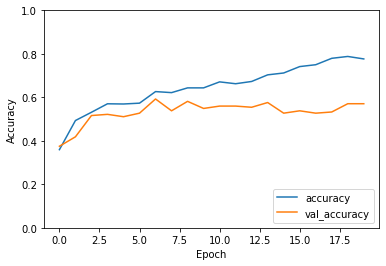

In [25]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.savefig('acc_graph_CNN.jpg')

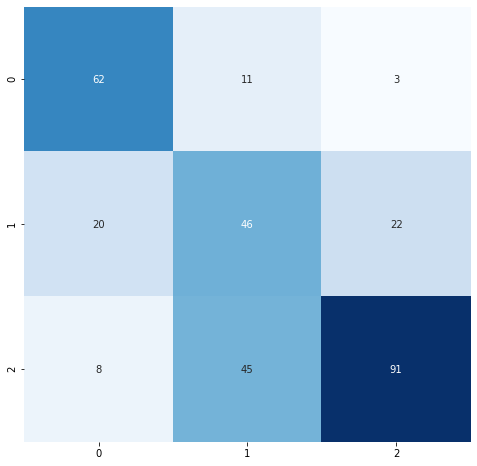

In [26]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

i = 0
for i in range(0,100):
    np.argmax(predictions[i])
    
PreLabel = []
for i in range(0,len(predictions)):
    PreLabel.append(np.argmax(predictions[i]))
    
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(PreLabel, test_labels), annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues)
plt.savefig('confusion_CNN.jpg')